# Попадает ли точка в фигуру?

Потребуются `pip install tensorflow keras`

In [8]:
import os
import numpy as np
import math
from tensorflow.keras import models, layers

`XY` — 1000000 случайных точек, `Z` — попадает точка в фигуру (1) или нет (0)

In [9]:
  XY = np.random.random((1_000_000, 2)).astype(np.float32) * 4.0 - 2.0

  Z = np.array([
    1 if (x**2)**(0.33) + (y**2)**(0.33) <= (1.5)**(0.33) else 0
    for [x, y] in XY
  ], dtype=np.float32)

In [11]:
model = models.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(100, activation='sigmoid', use_bias=True),
    layers.Dense(20, activation='sigmoid', use_bias=True),
    layers.Dense(1, activation='sigmoid', use_bias=False)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics='accuracy'
)

In [12]:
if os.path.isfile("smart_duckling_colab.h5"):
    print("Loading existing synapses...")
    model.load_weights("smart_duckling_colab.h5")
else:
    print("Training the duckling...")
    model.fit(
        XY, Z,
        epochs=1000,
        batch_size=1000,
        use_multiprocessing=True,
        verbose=False
    )
    model.save("smart_duckling_colab.h5")

print("Done,", model.evaluate(XY, Z))

Training the duckling...
31250/31250 [==============================] - 38s 1ms/step - loss: 7.0509e-04 - accuracy: 0.9990
Done, [0.000705092737916857, 0.9990460276603699]


Ну и теперь посмотрим, как оно научилось ограничивать фигуру, но уже на 2500 точках...

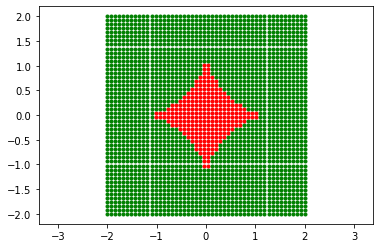

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.linspace(-2,2,50)

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.5 else 'green', marker='.')

plt.show()

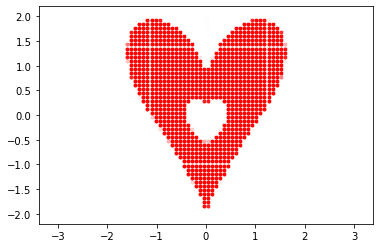

In [56]:
def saturate(v):
    return min(1, max(0, v))

plt.axis('equal')

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))], marker='.')

plt.show()